In [45]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
train = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Bike%20sharing%20system%20-%20Washington%20DC/train_bikes.csv',parse_dates=['datetime'])
test = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Bike%20sharing%20system%20-%20Washington%20DC/test_bikes.csv',parse_dates=['datetime'])

In [47]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [48]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [49]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [50]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [51]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [52]:
useful_columns = ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']

target = train['count']
train = train[useful_columns]
test = test[useful_columns]

In [53]:
date_time = train.pop('datetime')
date_time_test = test.pop('datetime')

In [54]:
timestamp_s = date_time.map(dt.datetime.timestamp)
timestamp_test = date_time_test.map(dt.datetime.timestamp)

In [55]:
timestamp_s

0        1.293840e+09
1        1.293844e+09
2        1.293847e+09
3        1.293851e+09
4        1.293854e+09
             ...     
10881    1.355944e+09
10882    1.355947e+09
10883    1.355951e+09
10884    1.355954e+09
10885    1.355958e+09
Name: datetime, Length: 10886, dtype: float64

In [56]:
day = 24*60*60
year = (365.2425)*day
train.loc[:,'Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
train.loc[:,'Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

train.loc[:,'Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
train.loc[:,'Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

test.loc[:,'Day sin'] = np.sin(timestamp_test * (2 * np.pi / day))
test.loc[:,'Day cos'] = np.cos(timestamp_test * (2 * np.pi / day))

test.loc[:,'Year sin'] = np.sin(timestamp_test * (2 * np.pi / year))
test.loc[:,'Year cos'] = np.cos(timestamp_test * (2 * np.pi / year))

In [57]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Day sin,Day cos,Year sin,Year cos
0,1,0,0,1,9.84,14.395,81,0.0,-7.057106e-12,1.000000,0.000989,1.000000
1,1,0,0,1,9.02,13.635,80,0.0,2.588190e-01,0.965926,0.001706,0.999999
2,1,0,0,1,9.02,13.635,80,0.0,5.000000e-01,0.866025,0.002423,0.999997
3,1,0,0,1,9.84,14.395,75,0.0,7.071068e-01,0.707107,0.003140,0.999995
4,1,0,0,1,9.84,14.395,75,0.0,8.660254e-01,0.500000,0.003856,0.999993


Text(0.5, 1.0, 'Time of day signal')

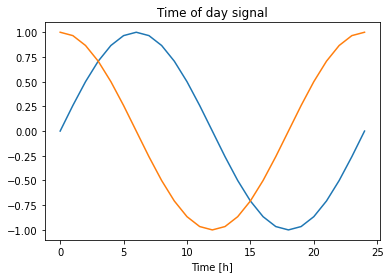

In [58]:
plt.plot(np.array(train['Day sin'])[:25])
plt.plot(np.array(train['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [59]:
column_indices = {name: i for i, name in enumerate(train.columns)}

n = len(train)
train_df = train[0:int(n*0.8)]
train_target = target[0:int(n*0.8)]

val_df = train[int(n*0.8):]
val_target = target[int(n*0.8):]


num_features = train.shape[1]

In [ ]:
train_df.describe()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import sklearn.metrics as sm

In [ ]:
# Random Forest Regressor
random_forest = RandomForestRegressor()

# K Nearest Neighbors Regressor
kneighbors = KNeighborsRegressor()

# SGD Regressor
sgd = SGDRegressor()

# xgb regressor
xgb = XGBRegressor()

In [ ]:
regressors_dict = {'random_forest':random_forest,'kneighbors':kneighbors,'sgd':sgd,'xgb':xgb}

In [ ]:
mae_df = pd.DataFrame(columns = ["regressor","score"])
mse_df = pd.DataFrame(columns=["regressor","score"])

for regressor_name in regressors_dict.keys():
    regressor = regressors_dict[regressor_name]
    regressor.fit(train_df, train_target)
    predictions = regressor.predict(val_df)
    
    mae =  round(sm.mean_absolute_error(predictions, val_target), 2)
    mse = round(sm.mean_squared_error(predictions, val_target), 2)
    
    mae_row = pd.DataFrame({'regressor':regressor_name,'score':mae}, index=[0])
    mae_df = mae_df.append(mae_row)
    
    mse_row = pd.DataFrame({'regressor':regressor_name,'score':mse}, index=[0])
    mse_df = mse_df.append(mse_row)
    
    print("Mean absolute error " + regressor_name + " =", mae) 
    print("Mean squared error " + regressor_name + " =", mse)
    print("-"*20)
    
mae_df = mae_df.reset_index(drop=True)
mse_df = mse_df.reset_index(drop=True)

In [ ]:
plt.title('MAE Classifier Comparisons')
sns.set_color_codes("muted")
sns.barplot(x='score', y='regressor', data=mae_df, color="b")
plt.xlabel('MAE Score')
plt.ylabel('Regressor')
plt.show()

In [ ]:
plt.title('MSE Classifier Comparisons')
sns.set_color_codes("muted")
sns.barplot(x='score', y='regressor', data=mse_df, color="b")
plt.xlabel('MSE Score')
plt.ylabel('Regressor')
plt.show()

In [ ]:
random_forest.fit(train_df, train_target)

In [ ]:
predictions = random_forest.predict(val_df)

In [ ]:
test.head()

In [ ]:
test_predictions = random_forest.predict(test)

In [ ]:
test_predictions = pd.DataFrame(test_predictions)
test_predictions.head(20)